Basics: 
* Loading data
* Image recognition
* simple dense network
* convolutional neural network.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential, load_model
from keras import regularizers, callbacks
from keras.layers import Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(validation_split=0.2,)
BATCH_SIZE =32
traning_data = datagen.flow_from_directory('generated_data/', 
                                           class_mode='categorical', 
                                           batch_size=BATCH_SIZE, 
                                           target_size=(128, 128),
                                           color_mode="grayscale",
                                           subset='training')
validation_data = datagen.flow_from_directory('generated_data/', 
                                           class_mode='categorical', 
                                           batch_size=BATCH_SIZE, 
                                           target_size=(128, 128),
                                           color_mode="grayscale",
                                           subset='validation')


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


{'box': 0, 'crag': 1, 'pighead': 2, 'rubbertoy': 3, 'squab': 4}
[0. 0. 0. 0. 1.] ['squab']


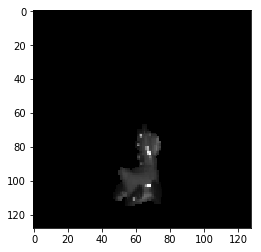

In [3]:
plt.imshow(traning_data[32][0][2,:].reshape(128, 128), cmap=plt.get_cmap('gray'))
print(traning_data.class_indices)
example_class = traning_data[1][1][0]
print(example_class, [k for k, v in traning_data.class_indices.items() 
                      if v == np.where(example_class == 1)[0][0]])

Simple dense network

In [4]:
model = Sequential() 

model.add(Flatten(input_shape=(128, 128, 1))) 
model.add(Dense(4096, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))  
model.add(Dense(1024, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))  
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(5, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',  # categorical_binary for 0-1 categories
             metrics=['accuracy']) 

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              67112960  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 645       
Total params: 71,440,133
Trainable params: 71,440,133
Non-trainable params: 0
_________________________________________________________________


In [7]:
early_stopping = callbacks.EarlyStopping(monitor='accuracy', verbose=1, patience=3)

In [8]:
model.fit_generator(traning_data, 
                    epochs=500,
                    steps_per_epoch=traning_data.n/BATCH_SIZE,
                    validation_data=validation_data,
                    validation_steps=validation_data.n/BATCH_SIZE,
                    callbacks=[early_stopping]
                   )

W1210 21:07:28.409847 140356428654400 deprecation_wrapper.py:119] From /home/pawel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/500
125/125 [==============================] - 114s 913ms/step - loss: 27.1772 - accuracy: 0.8857 - val_loss: 114.8480 - val_accuracy: 0.9710
Epoch 2/500
125/125 [==============================] - 114s 910ms/step - loss: 2.7065 - accuracy: 0.9647 - val_loss: 0.4981 - val_accuracy: 0.9660
Epoch 3/500
125/125 [==============================] - 114s 910ms/step - loss: 0.9980 - accuracy: 0.9843 - val_loss: 0.4927 - val_accuracy: 0.9830
Epoch 4/500
125/125 [==============================] - 114s 910ms/step - loss: 0.6894 - accuracy: 0.9862 - val_loss: 0.4840 - val_accuracy: 0.9920
Epoch 5/500
125/125 [==============================] - 114s 911ms/step - loss: 0.5299 - accuracy: 0.9920 - val_loss: 0.4747 - val_accuracy: 0.9950
Epoch 6/500
125/125 [==============================] - 114s 910ms/step - loss: 0.5468 - accuracy: 0.9915 - val_loss: 0.4654 - val_accuracy: 0.9930
Epoch 7/500
125/125 [==============================] - 113s 907ms/step - loss: 0.7967 - accuracy: 0.9835 - val_loss

In [9]:
model.evaluate_generator(validation_data, steps=100)

[0.44913220405578613, 0.9894501566886902]

In [10]:
model.save('recognise_images_dense.model')

In [11]:
loaded_model = load_model('recognise_images_dense.model')

In [12]:
predictions = loaded_model.predict_generator(validation_data, steps=10)
print(predictions)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.2040020e-24 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.8721455e-34]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


[5.5441586e-24 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.2636886e-31]
best guess:  pighead
filename:  box/0023.png


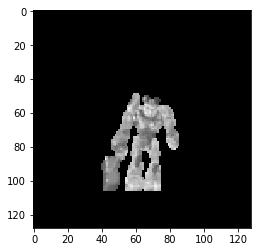

In [13]:
idx = 22
print(predictions[idx]) 
reversed_classes = {v: k for k, v in validation_data.class_indices.items()}
print("best guess: ", reversed_classes[np.argmax(predictions[idx])])
print("filename: ", validation_data.filenames[idx])
plt.imshow(validation_data[idx][0][0,:].reshape(128, 128), cmap=plt.get_cmap('gray'))

CNN - convolutional neural network

In [14]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [15]:
# Build convolutional neural network

model_cnn = Sequential()

model_cnn.add(Conv2D(16,(5,5), padding = 'same', activation = 'relu', input_shape = (128,128,1)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.1))

model_cnn.add(Conv2D(32, (5,5), padding = 'same', activation = 'relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.1))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dense(5, activation="tanh"))


model_cnn.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_cnn.summary()

W1210 21:22:53.586114 140356428654400 deprecation_wrapper.py:119] From /home/pawel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        12832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)       

In [16]:
# Using workers=2, use_multiprocessing=True sometimes resulted in freeze
result_cnn = model_cnn.fit_generator(traning_data, verbose=1, validation_data=validation_data,
                                            epochs=500, 
                                    callbacks=[early_stopping])
model_cnn.save('recognise_images_cnn.model')

W1210 21:22:53.846492 140356428654400 deprecation.py:323] From /home/pawel/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
125/125 [==============================] - 35s 279ms/step - loss: 6.4528 - accuracy: 0.1988 - val_loss: 4.0295 - val_accuracy: 0.2000
Epoch 2/500
125/125 [==============================] - 34s 273ms/step - loss: 6.4472 - accuracy: 0.2000 - val_loss: 10.0738 - val_accuracy: 0.2000
Epoch 3/500
125/125 [==============================] - 33s 263ms/step - loss: 6.4472 - accuracy: 0.2000 - val_loss: 6.0443 - val_accuracy: 0.2000
Epoch 4/500
125/125 [==============================] - 33s 267ms/step - loss: 6.4472 - accuracy: 0.2000 - val_loss: 6.0443 - val_accuracy: 0.2000
Epoch 5/500
125/125 [==============================] - 33s 262ms/step - loss: 6.4472 - accuracy: 0.2000 - val_loss: 8.0590 - val_accuracy: 0.2000
Epoch 00005: early stopping


In [17]:
loaded_model = load_model('recognise_images_cnn.model')

In [18]:
predictions = loaded_model.predict_generator(validation_data, steps=10)
print(predictions)

[[ 1. -1.  1. -1.  1.]
 [ 1. -1.  1. -1.  1.]
 [ 1. -1.  1. -1.  1.]
 ...
 [ 1. -1.  1. -1.  1.]
 [ 1. -1.  1. -1.  1.]
 [ 1. -1.  1. -1.  1.]]


[ 1. -1.  1. -1.  1.]
best guess:  box
filename:  box/0023.png


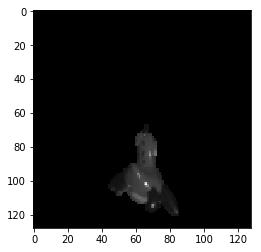

In [19]:
idx = 22
print(predictions[idx]) 
reversed_classes = {v: k for k, v in validation_data.class_indices.items()}
print("best guess: ", reversed_classes[np.argmax(predictions[idx])])
print("filename: ", validation_data.filenames[idx])
plt.imshow(validation_data[idx][0][0,:].reshape(128, 128), cmap=plt.get_cmap('gray'))